In [186]:
# imports for the HW
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os
from numpy.linalg import eig

In [151]:
def show_gray_image(img, title: str,is_gray=1):
    if not is_gray:
        img = img.astype(np.uint8)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.imshow(img, cmap="gray")
    ax.set_axis_off()
def show_color_image(img, title: str):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.imshow(img)
    ax.set_axis_off()    
def show_histogram(img, num_of_bins=256):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title("Histogram of gray levels")
    ax.set_xlabel('gray level')
    ax.hist(img.reshape(-1), num_of_bins)
def make_gray(img):
    img = img.astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
def crop_frame(img,range_x_start,range_x_end,range_y_start,range_y_end):
    new_img=img[range_y_start:range_y_end,range_x_start:range_x_end]
    return new_img
def show_gray_panorama(img, title: str):
    fig = plt.figure(figsize=(16, 32))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.imshow(img, cmap="gray")
    ax.set_axis_off()
def video_to_frames(vid_path: str, start_second, end_second):
    capture = cv2.VideoCapture(vid_path)
    #getting fps and initializing frame_set
    frame_set = []
    fps = int(capture.get(cv2.CAP_PROP_FPS))  
    first_frame = start_second*fps
    Last_frame = end_second*fps
    num_of_frames = 1 + (Last_frame-first_frame)
    #saving frames to frame_set
    i = 0
    current_frame = 0
    successful = True
    while (successful and i<num_of_frames):
        successful, next_frame = capture.read()
        #next_frame = cv2.cvtColor(next_frame,cv2.COLOR_BGR2GRAY)
        current_frame+=1
        if (successful and current_frame >= first_frame): 
            frame_set.append(next_frame)
            i += 1
    frame_set = np.array(frame_set) # convert to np array,dimensions (T*fps, H, W, C)
    capture.release()
    return frame_set


Text(0, 0.5, 'Gray level')

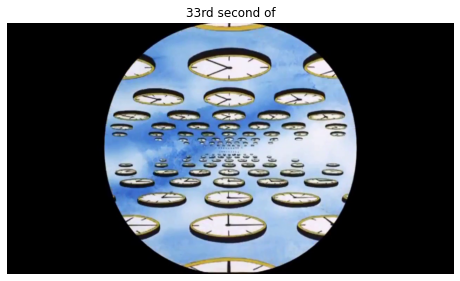

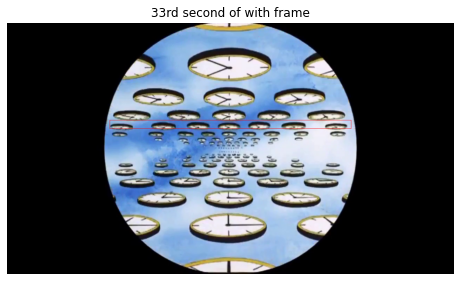

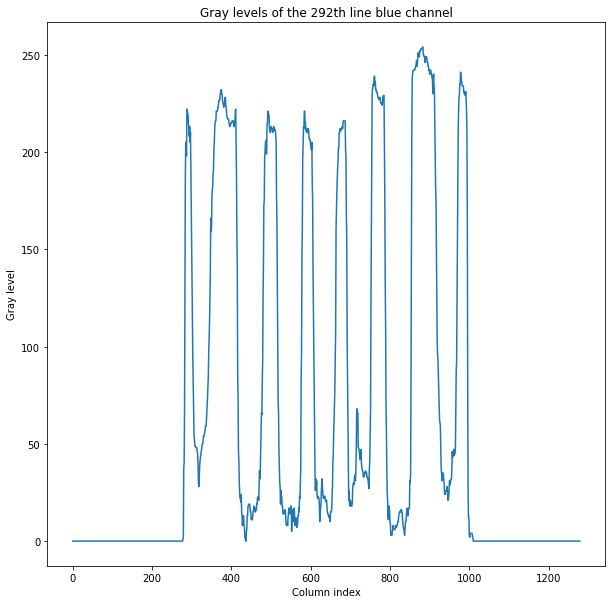

In [152]:
#1
captured_img=np.squeeze(video_to_frames('../given_data/Time - Pink Floyd.mp4',33,33), axis=0)
captured_img_rgb= cv2.cvtColor(captured_img, cv2.COLOR_BGR2RGB)
show_color_image(captured_img_rgb,'33rd second of')



captured_img_rgb_Copy=captured_img_rgb.copy()

captured_img_rgb_Copy[280:281,int(1280*0.23):int(1280*0.77)+1]=[255,0,0]
captured_img_rgb_Copy[304:305,int(1280*0.23):int(1280*0.77)+1]=[255,0,0]
captured_img_rgb_Copy[280:305,int(1280*0.23):int(1280*0.23)+1]=[255,0,0]
captured_img_rgb_Copy[280:305,int(1280*0.77):int(1280*0.77)+1]=[255,0,0]

show_color_image(captured_img_rgb_Copy,'33rd second of with frame')
desierd_row=captured_img_rgb[292,:,2]

fig2 = plt.figure(figsize=(10, 10))
plt.plot(desierd_row)
plt.title("Gray levels of the 292th line blue channel")
plt.xlabel("Column index")
plt.ylabel("Gray level")


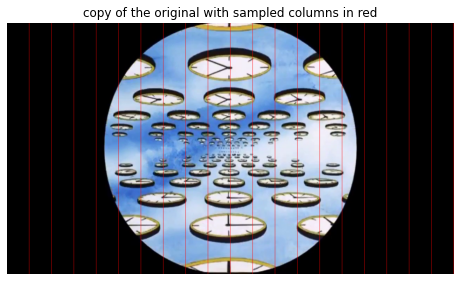

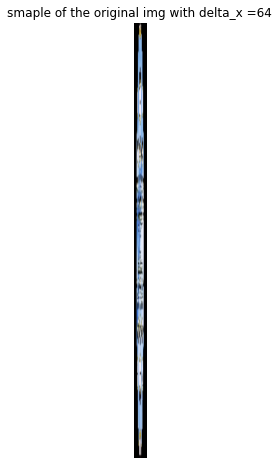

In [153]:
#
captured_img_rgb_Copy2=captured_img_rgb.copy()
width=captured_img_rgb_Copy2.shape[1]
middle=int(width/2)
sampled = np.copy(captured_img_rgb[:,63::64,:])
captured_img_rgb_Copy2[:,63::64]=[255,0,0]
show_color_image(captured_img_rgb_Copy2,'copy of the original with sampled columns in red')
show_color_image(sampled,'smaple of the original img with delta_x =64')




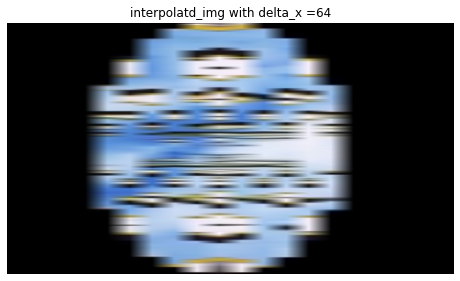

In [154]:
#
dim=captured_img_rgb_Copy2.shape[1],captured_img_rgb_Copy2.shape[0]
interpolatd_img= cv2.resize(sampled,dim)
show_color_image(interpolatd_img,'interpolatd_img with delta_x =64')

Text(0, 0.5, 'Gray level')

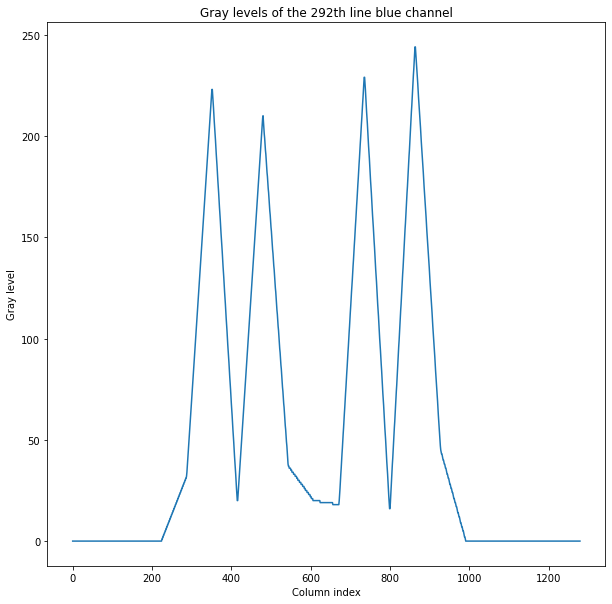

In [155]:
fig2 = plt.figure(figsize=(10, 10))
plt.plot(interpolatd_img[292,:,2])
plt.title("Gray levels of the 292th line blue channel")
plt.xlabel("Column index")
plt.ylabel("Gray level")


In [156]:
desierd_video=video_to_frames('../given_data/Time - Pink Floyd.mp4',30,45)
path = ('../my_data/my_video.mp4')
output_format = cv2.VideoWriter_fourcc('M','P','4','V')
num_of_frames =desierd_video.shape[0]
output_fps = int(num_of_frames / 15) 
output = cv2.VideoWriter(path, output_format, output_fps, dim)
for i in range (num_of_frames):
    if i % 16 == 0:
        current_frame = desierd_video[i,:,:,:]
    output.write(current_frame)
output.release()






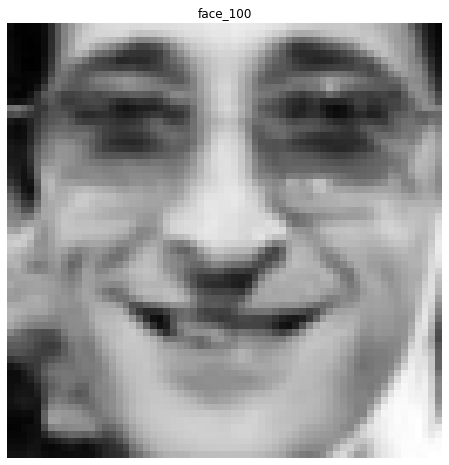

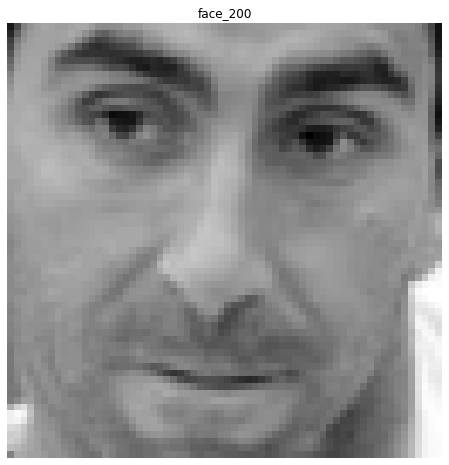

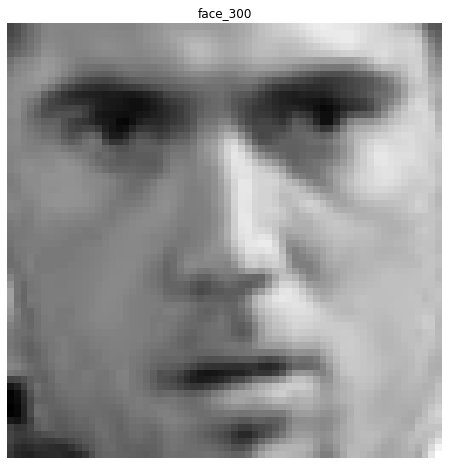

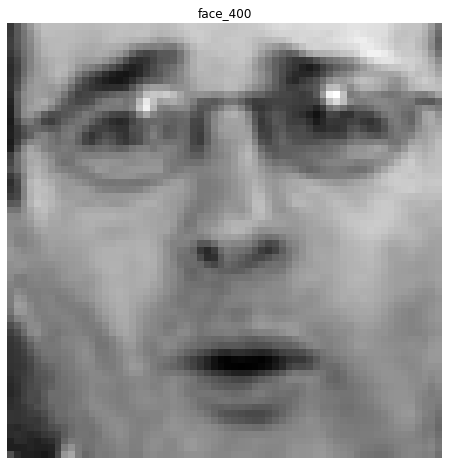

In [204]:
#2.a.1
LFW_path = "../given_data/LFW"
images = []
file_name = []
for filename in os.listdir(LFW_path):
    curr_img = cv2.imread(os.path.join(LFW_path,filename))
    if curr_img is not None:
        curr_img = curr_img.astype(np.uint8)
        curr_img = cv2.cvtColor(curr_img, cv2.COLOR_BGR2GRAY)
        images.append(curr_img)    
images = np.array(images)
images = np.swapaxes(images, 0,2)
images = np.swapaxes(images, 0,1)
show_gray_image(images[:,:,100],'face_100',1)
show_gray_image(images[:,:,200],'face_200',1)
show_gray_image(images[:,:,300],'face_300',1)
show_gray_image(images[:,:,400],'face_400',1)

In [316]:
#2.a.2
a = images[:,:,0].size
b = images.shape[-1]
X = images.reshape((a,b),  order = 'F').astype('float')


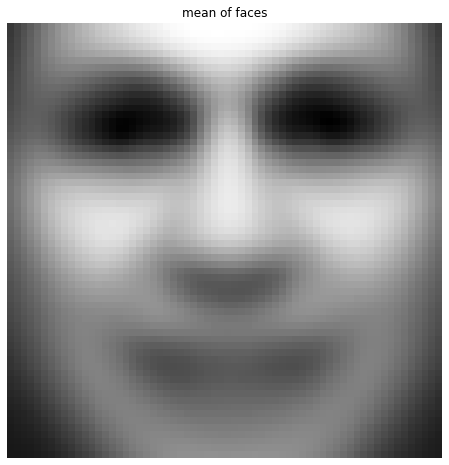

In [181]:
#2.a.3
X_mean=np.mean(X,axis=1)
X_mean_img= X_mean.reshape((64,64), order = 'F').astype('float')
mu= X_mean.reshape((4096,1), order = 'F').astype('float')
show_gray_image(X_mean_img,'mean of faces',1)
Y=X-mu


In [315]:
#2.a.4
cov_y=np.cov(Y)


Text(0, 0.5, 'Eigen values ')

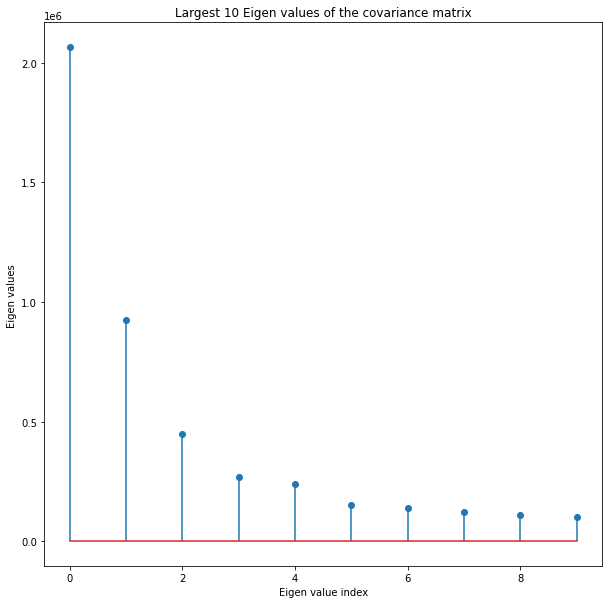

In [198]:
#2.b
k = 10
all_eig_vals , all_eig_vecs = np.linalg.eigh(cov_y)
all_eig_vals = np.flip(all_eig_vals)
all_eig_vecs = np.flip(all_eig_vecs, axis = 1)

eig_vals = all_eig_vals[0:k]
eig_vecs = all_eig_vecs[: , 0:k]

fig2 = plt.figure(figsize=(10, 10))
plt.stem(eig_vals)
plt.title("Largest 10 Eigen values of the covariance matrix")
plt.xlabel("Eigen value index")
plt.ylabel("Eigen values ")



(4096,)


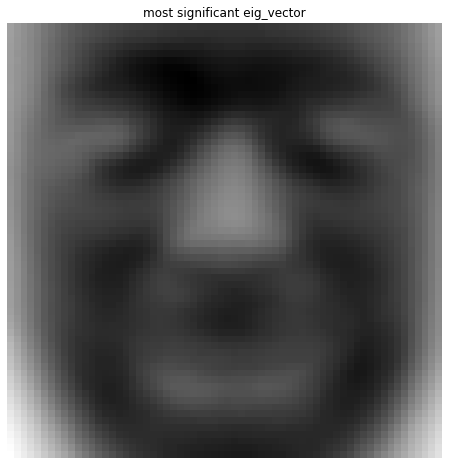

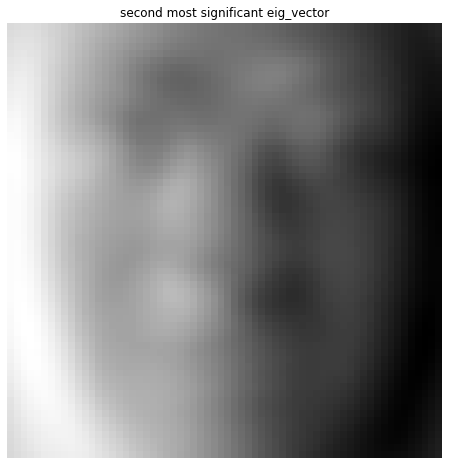

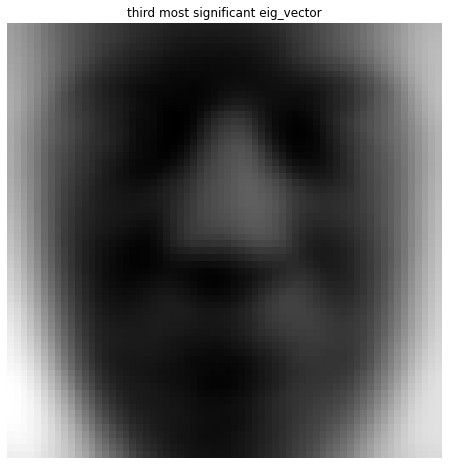

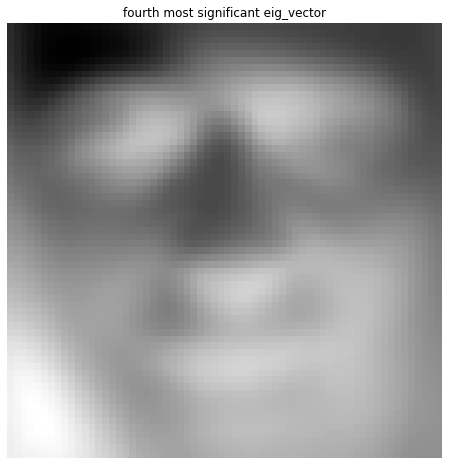

In [219]:

img1=(eig_vecs[:,0]).reshape((64,64), order = 'F').astype('float')
img2=(eig_vecs[:,1]).reshape((64,64), order = 'F').astype('float')
img3=(eig_vecs[:,2]).reshape((64,64), order = 'F').astype('float')
img4=(eig_vecs[:,3]).reshape((64,64), order = 'F').astype('float')

show_gray_image(img1,'most significant eig_vector',1)
show_gray_image(img2,'second most significant eig_vector',1)
show_gray_image(img3,'third most significant eig_vector',1)
show_gray_image(img4,'fourth most significant eig_vector',1)

In [314]:
#2.c
p=(eig_vecs.T)@Y



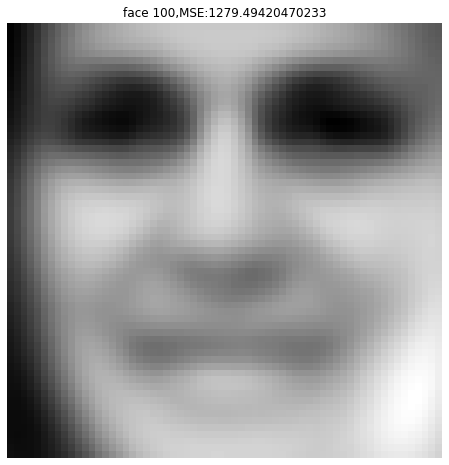

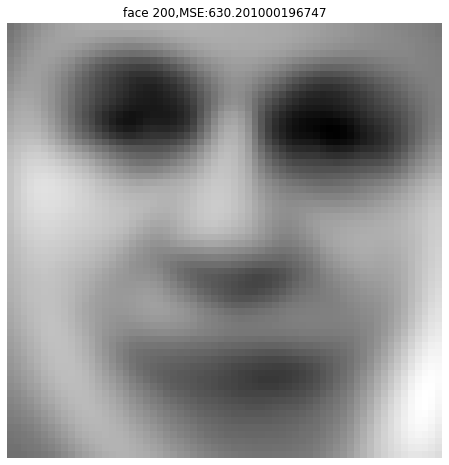

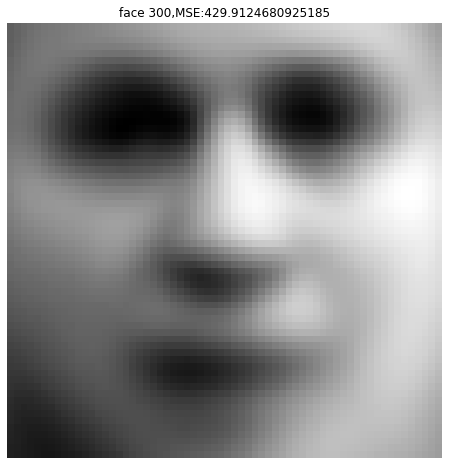

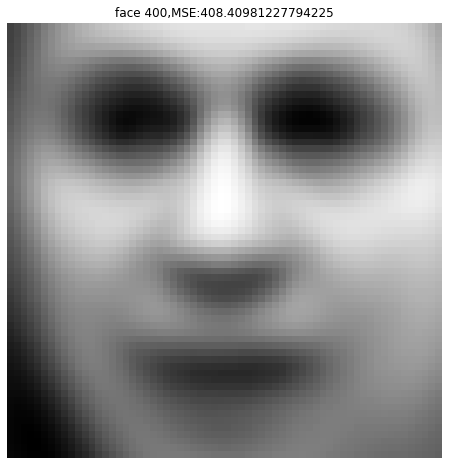

In [236]:
#2.d
p1=np.expand_dims(p[:,100],axis=1)
p2=np.expand_dims(p[:,200],axis=1)
p3=np.expand_dims(p[:,300],axis=1)
p4=np.expand_dims(p[:,400],axis=1)

x_1=eig_vecs@p1+mu
x_2=eig_vecs@p2+mu
x_3=eig_vecs@p3+mu
x_4=eig_vecs@p4+mu

img_x1=np.reshape(x_1,(64,64), order = 'F').astype('float')
img_x2=np.reshape(x_2,(64,64), order = 'F').astype('float')
img_x3=np.reshape(x_3,(64,64), order = 'F').astype('float')
img_x4=np.reshape(x_4,(64,64), order = 'F').astype('float')

mse=np.zeros(4)
mse[0]=((img_x1-images[:,:,100])**2).mean()
mse[1]=((img_x2-images[:,:,200])**2).mean()
mse[2]=((img_x3-images[:,:,300])**2).mean()
mse[3]=((img_x4-images[:,:,400])**2).mean()

show_gray_image(img_x1,f'face 100,MSE:{mse[0]}',1)
show_gray_image(img_x2,f'face 200,MSE:{mse[1]}',1)
show_gray_image(img_x3,f'face 300,MSE:{mse[2]}',1)
show_gray_image(img_x4,f'face 400,MSE:{mse[3]}',1)

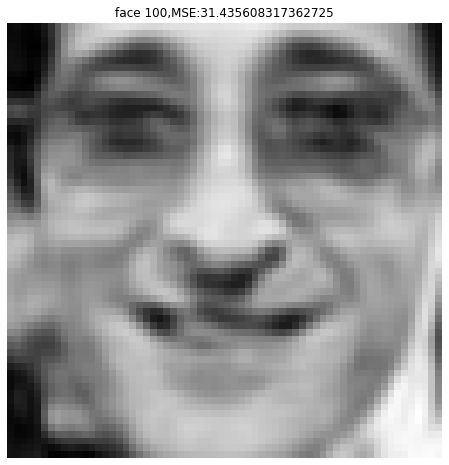

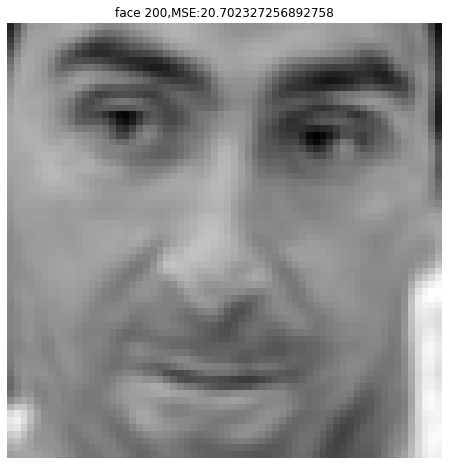

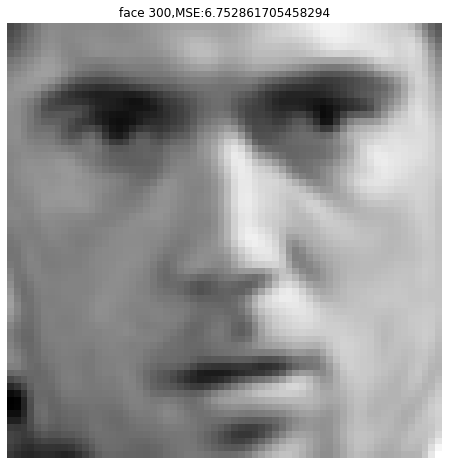

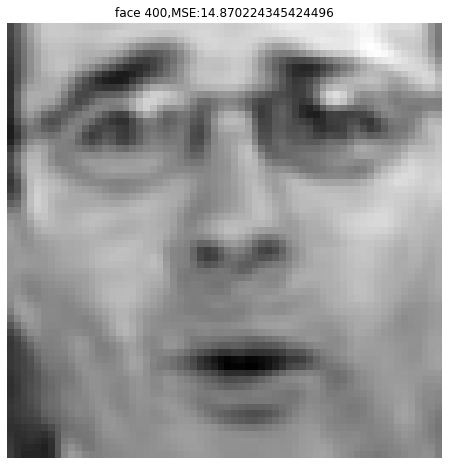

In [238]:
#2.e
k = 570

eig_vals_570 = all_eig_vals[0:k]
eig_vecs_570 = all_eig_vecs[: , 0:k]

p_570=(eig_vecs_570.T)@Y

p_1=np.expand_dims(p_570[:,100],axis=1)
p_2=np.expand_dims(p_570[:,200],axis=1)
p_3=np.expand_dims(p_570[:,300],axis=1)
p_4=np.expand_dims(p_570[:,400],axis=1)

x_1_570=eig_vecs_570@p_1+mu
x_2_570=eig_vecs_570@p_2+mu
x_3_570=eig_vecs_570@p_3+mu
x_4_570=eig_vecs_570@p_4+mu

img_x1_570=np.reshape(x_1_570,(64,64), order = 'F').astype('float')
img_x2_570=np.reshape(x_2_570,(64,64), order = 'F').astype('float')
img_x3_570=np.reshape(x_3_570,(64,64), order = 'F').astype('float')
img_x4_570=np.reshape(x_4_570,(64,64), order = 'F').astype('float')

mse_570=np.zeros(4)
mse_570[0]=((img_x1_570-images[:,:,100])**2).mean()
mse_570[1]=((img_x2_570-images[:,:,200])**2).mean()
mse_570[2]=((img_x3_570-images[:,:,300])**2).mean()
mse_570[3]=((img_x4_570-images[:,:,400])**2).mean()

show_gray_image(img_x1_570,f'face 100,MSE:{mse_570[0]}',1)
show_gray_image(img_x2_570,f'face 200,MSE:{mse_570[1]}',1)
show_gray_image(img_x3_570,f'face 300,MSE:{mse_570[2]}',1)
show_gray_image(img_x4_570,f'face 400,MSE:{mse_570[3]}',1)

In [252]:
#3
def pyr_gen(n, m, img, gauss_pyr, laplace_pyr):
    assert m>=0 and m<=n
    gauss_pyr.extend([img]) # add Gm
    g_next = cv2.pyrDown(img) # calculate Gm+1 
    if(m != n):
        L_m = gauss_pyr[m].astype(np.int) - (cv2.pyrUp(g_next)).astype(np.int)    # Calculate L[m] = G[m] - pyrUp[G_m+1]
        laplace_pyr.extend([L_m])
        pyr_gen(n, m+1 , g_next , gauss_pyr, laplace_pyr)   #the recursive step      
    else: 
        L_m = gauss_pyr[m]
        laplace_pyr.append(L_m) 
    return gauss_pyr, laplace_pyr


In [308]:
#3.a
ironman_img = cv2.imread('../given_data/Ironman.jpg')
ironman_img = cv2.cvtColor(ironman_img, cv2.COLOR_BGR2GRAY)
downey_img  = cv2.imread('../given_data/Downey.jpg')
downey_img  = cv2.cvtColor(downey_img, cv2.COLOR_BGR2GRAY)
ironman_gauss_pyr, ironman_laplace_pyr = pyr_gen(4,0,ironman_img,[],[])
downey_gauss_pyr, downey_laplace_pyr = pyr_gen(4,0,downey_img ,[],[])

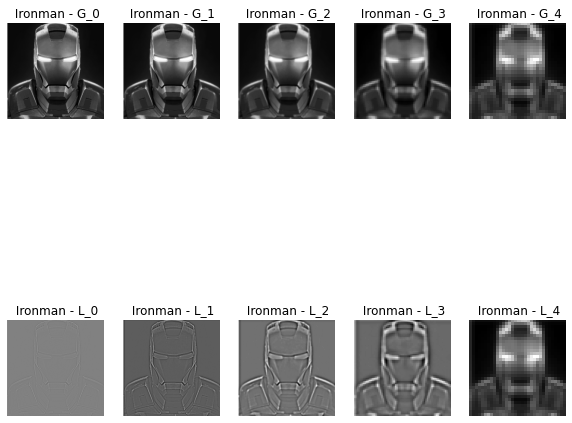

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

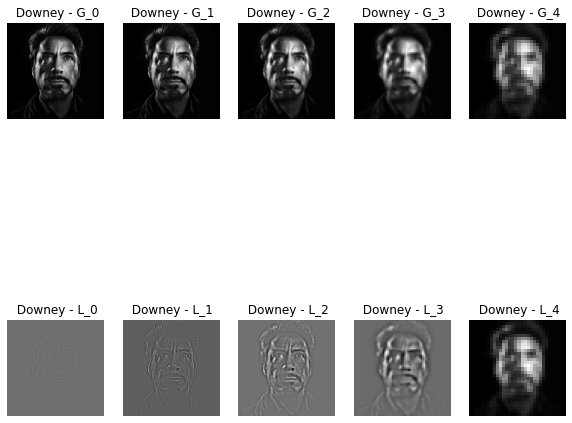

In [262]:
fig1 = plt.figure(figsize=(10, 10))
for idx in range(5):
    ax = fig1.add_subplot(2, 5 ,idx+1) 
    ax.imshow(ironman_gauss_pyr[idx] ,cmap = "gray")
    ax.set_title(f" Ironman - G_{idx}")
    ax.set_axis_off()
    
    ay = fig1.add_subplot(2, 5 ,idx+5+1) 
    ay.imshow(ironman_laplace_pyr[idx],cmap = "gray")
    ay.set_title(f" Ironman - L_{idx}")
    ay.set_axis_off()
    fig2 = plt.figure(figsize=(10, 10))
for idx in range(5):
    ax = fig2.add_subplot(2, 5 ,idx+1) 
    ax.imshow(downey_gauss_pyr[idx] ,cmap = "gray")
    ax.set_title(f" Downey - G_{idx}")
    ax.set_axis_off()
    
    ay = fig2.add_subplot(2, 5 ,idx+5+1) 
    ay.imshow(downey_laplace_pyr[idx],cmap = "gray")
    ay.set_title(f" Downey - L_{idx}")
    ay.set_axis_off()



In [264]:
#3.b
def laplace_recon(laplace_pyr):
    if (len(laplace_pyr) == 1) : #final-step
        return(laplace_pyr.pop(0))
    L_current = laplace_pyr.pop(0)
    
    last_rec_img = laplace_recon(laplace_pyr)
    last_rec_img = last_rec_img.astype(np.uint8)
    last_rec_img = cv2.pyrUp(last_rec_img)
    last_rec_img = last_rec_img.astype(np.int)

    recon_img = L_current + last_rec_img
    recon_img = recon_img.astype(np.uint8)
    
    # ========================

    return recon_img

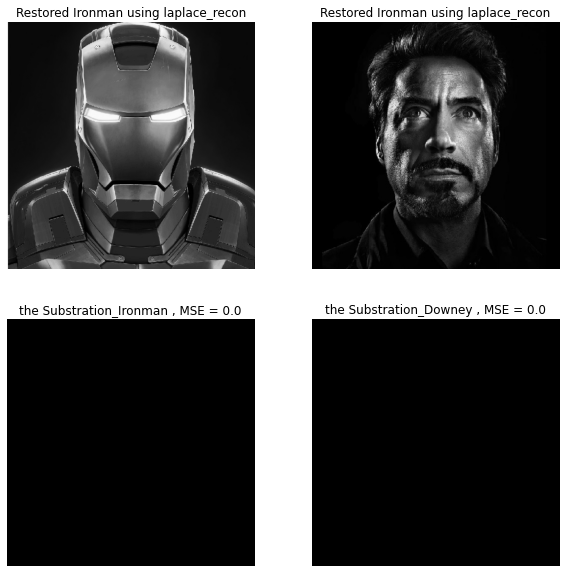

In [274]:
restored_ironman = laplace_recon(ironman_laplace_pyr.copy())
restored_downey = laplace_recon(downey_laplace_pyr.copy())
MSE_iron = np.mean(np.square(ironman_img -restored_ironman))
MSE_down = np.mean(np.square(downey_img -restored_downey))

fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(2, 2 ,1) 
ax.imshow(restored_ironman ,cmap = "gray")
ax.set_title("Restored Ironman using laplace_recon")
ax.set_axis_off()

ax = fig1.add_subplot(2, 2 ,3) 
ax.imshow(ironman_img -restored_ironman ,cmap = "gray")
ax.set_title(f"the Substration_Ironman , MSE = {MSE_iron}")
ax.set_axis_off()

ax = fig1.add_subplot(2, 2 ,2) 
ax.imshow(restored_downey ,cmap = "gray")
ax.set_title("Restored Ironman using laplace_recon")
ax.set_axis_off()

ax = fig1.add_subplot(2, 2 ,4) 
ax.imshow(downey_img -restored_downey ,cmap = "gray")
ax.set_title(f"the Substration_Downey , MSE = {MSE_iron}")
ax.set_axis_off()




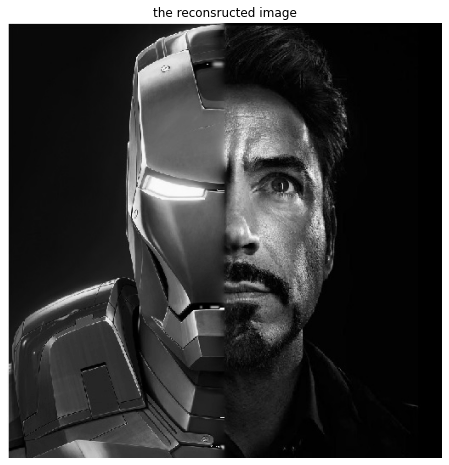

In [313]:

mask_temp = np.reshape(np.array([1,0]),(1,-1))
mask = np.repeat(mask_temp,ironman_img.shape[1]//2, axis=1)
mask = np.repeat(mask,ironman_img.shape[0], axis=0).astype(np.uint8)


mask_gauss_pyr, mask_laplace_pyr = pyr_gen(4,0,mask,[],[])
l_blend=[]
sizeof=len(mask_gauss_pyr)
for i in range(sizeof) :
    l_blend.extend([mask_gauss_pyr[i] * ironman_laplace_pyr[i] + (1- mask_gauss_pyr[i])*downey_laplace_pyr[i]])

restore_blend = laplace_recon(l_blend.copy())
show_gray_image(restore_blend,'the reconsructed image',1)